<a href="https://colab.research.google.com/github/zairapg/hiperblog/blob/main/Actividad_regres_logist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Aprendizaje Supervisado

   Zaira Pizo Gurrute.

## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.


In [565]:
!pip install ucimlrepo
!pip install pyod

In [566]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import openpyxl as xl
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print


# 1. Se realiza el cargue del conjunto de datos en un data frame de pandas (data).


# fetch dataset
dermatology = fetch_ucirepo(id=33)

# data (as pandas dataframes)
X = dermatology.data.features
y = dermatology.data.targets

# metadata
print(dermatology.metadata)

# variable information
print(dermatology.variables)

data = X.copy()
data['target'] = y

# Imprimir los primeros registros para verificar
print(data.head())

data.to_excel('D:\derma.xlsx', index=False)





{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'ID': 387, 'type': 'NATIVE', 'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'venue': 'Artif. Intell. Medicine', 'year': 1998, 'journal': No

In [567]:
#Cuál es el número de registros? #Cuál es el número de atributos?

shape = data.shape
print ('Se establece el numero de registros y numero de atributos en su orden',shape)

Se establece el numero de registros y numero de atributos en su orden (366, 35)


In [568]:
#Cual es el tipo de los atributos?
print ('Para el total de atributos se identifica el tipo de dato por cada atributo')
data.dtypes

Para el total de atributos se identifica el tipo de dato por cada atributo


,0
erythema,int64
scaling,int64
definite-borders,int64
itching,int64
koebner phenomenon,int64
polygonal papules,int64
follicular papules,int64
oral-mucosal involvement,int64
knee elbow involvement,int64
scalp involvement,int64


In [569]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,target
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


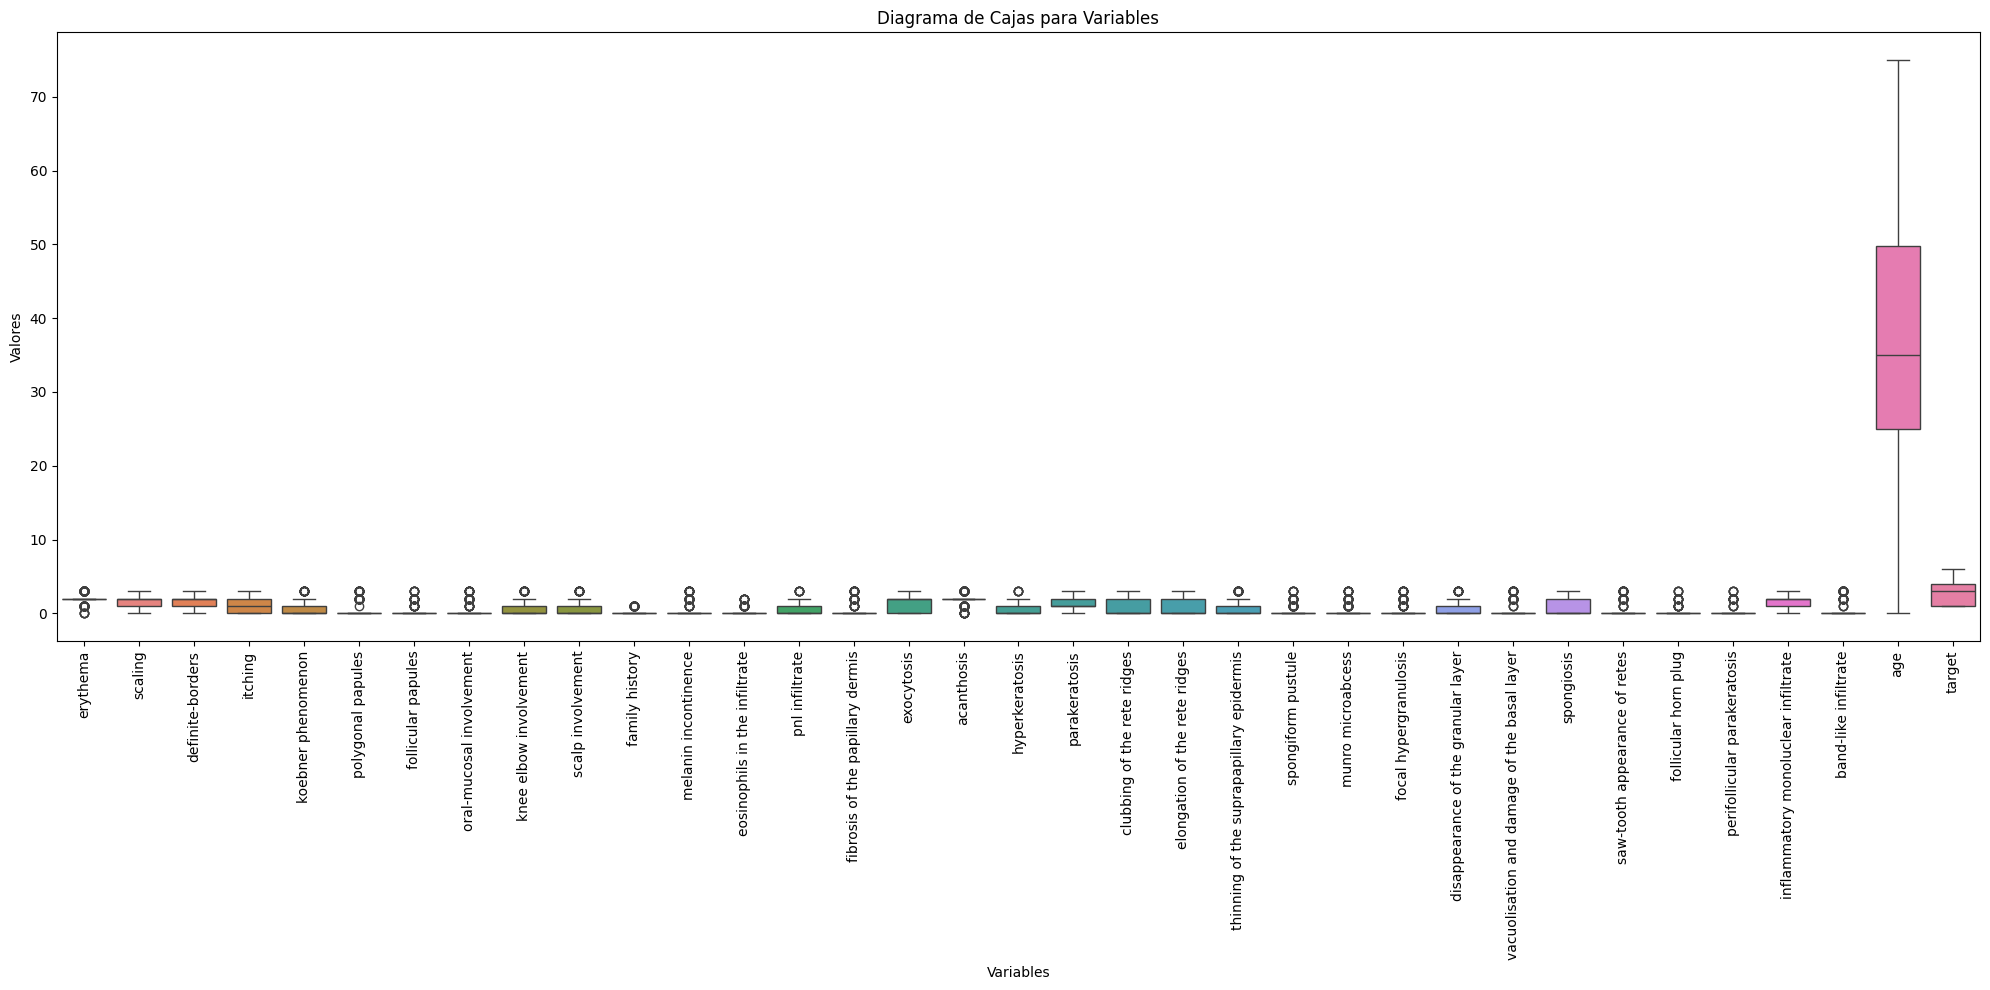

In [570]:
#Grafico de cajas y bigotes
plt.figure(figsize=(20,10))  # Ajustar tamaño de la figura
sns.boxplot(data=data)

# Configuración de la gráfica
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para que se vean bien
plt.title("Diagrama de Cajas para Variables")
plt.xlabel("Variables")
plt.ylabel("Valores")

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()


In [571]:
#Medida de centralidad para atributos categóricos , numericos:
data.mode()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,target
0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,40.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN


In [572]:
#Matriz de correlacion
data.corr()


,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,target
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.005028,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.016006,-0.468688
definite-borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.138493,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.048053,0.054772
koebner phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.081162,-0.091323
polygonal papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.096953,0.057785
follicular papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.371368,0.477813
oral-mucosal involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.111047,0.055805
knee elbow involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.078267,-0.383305
scalp involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.036412,-0.533208


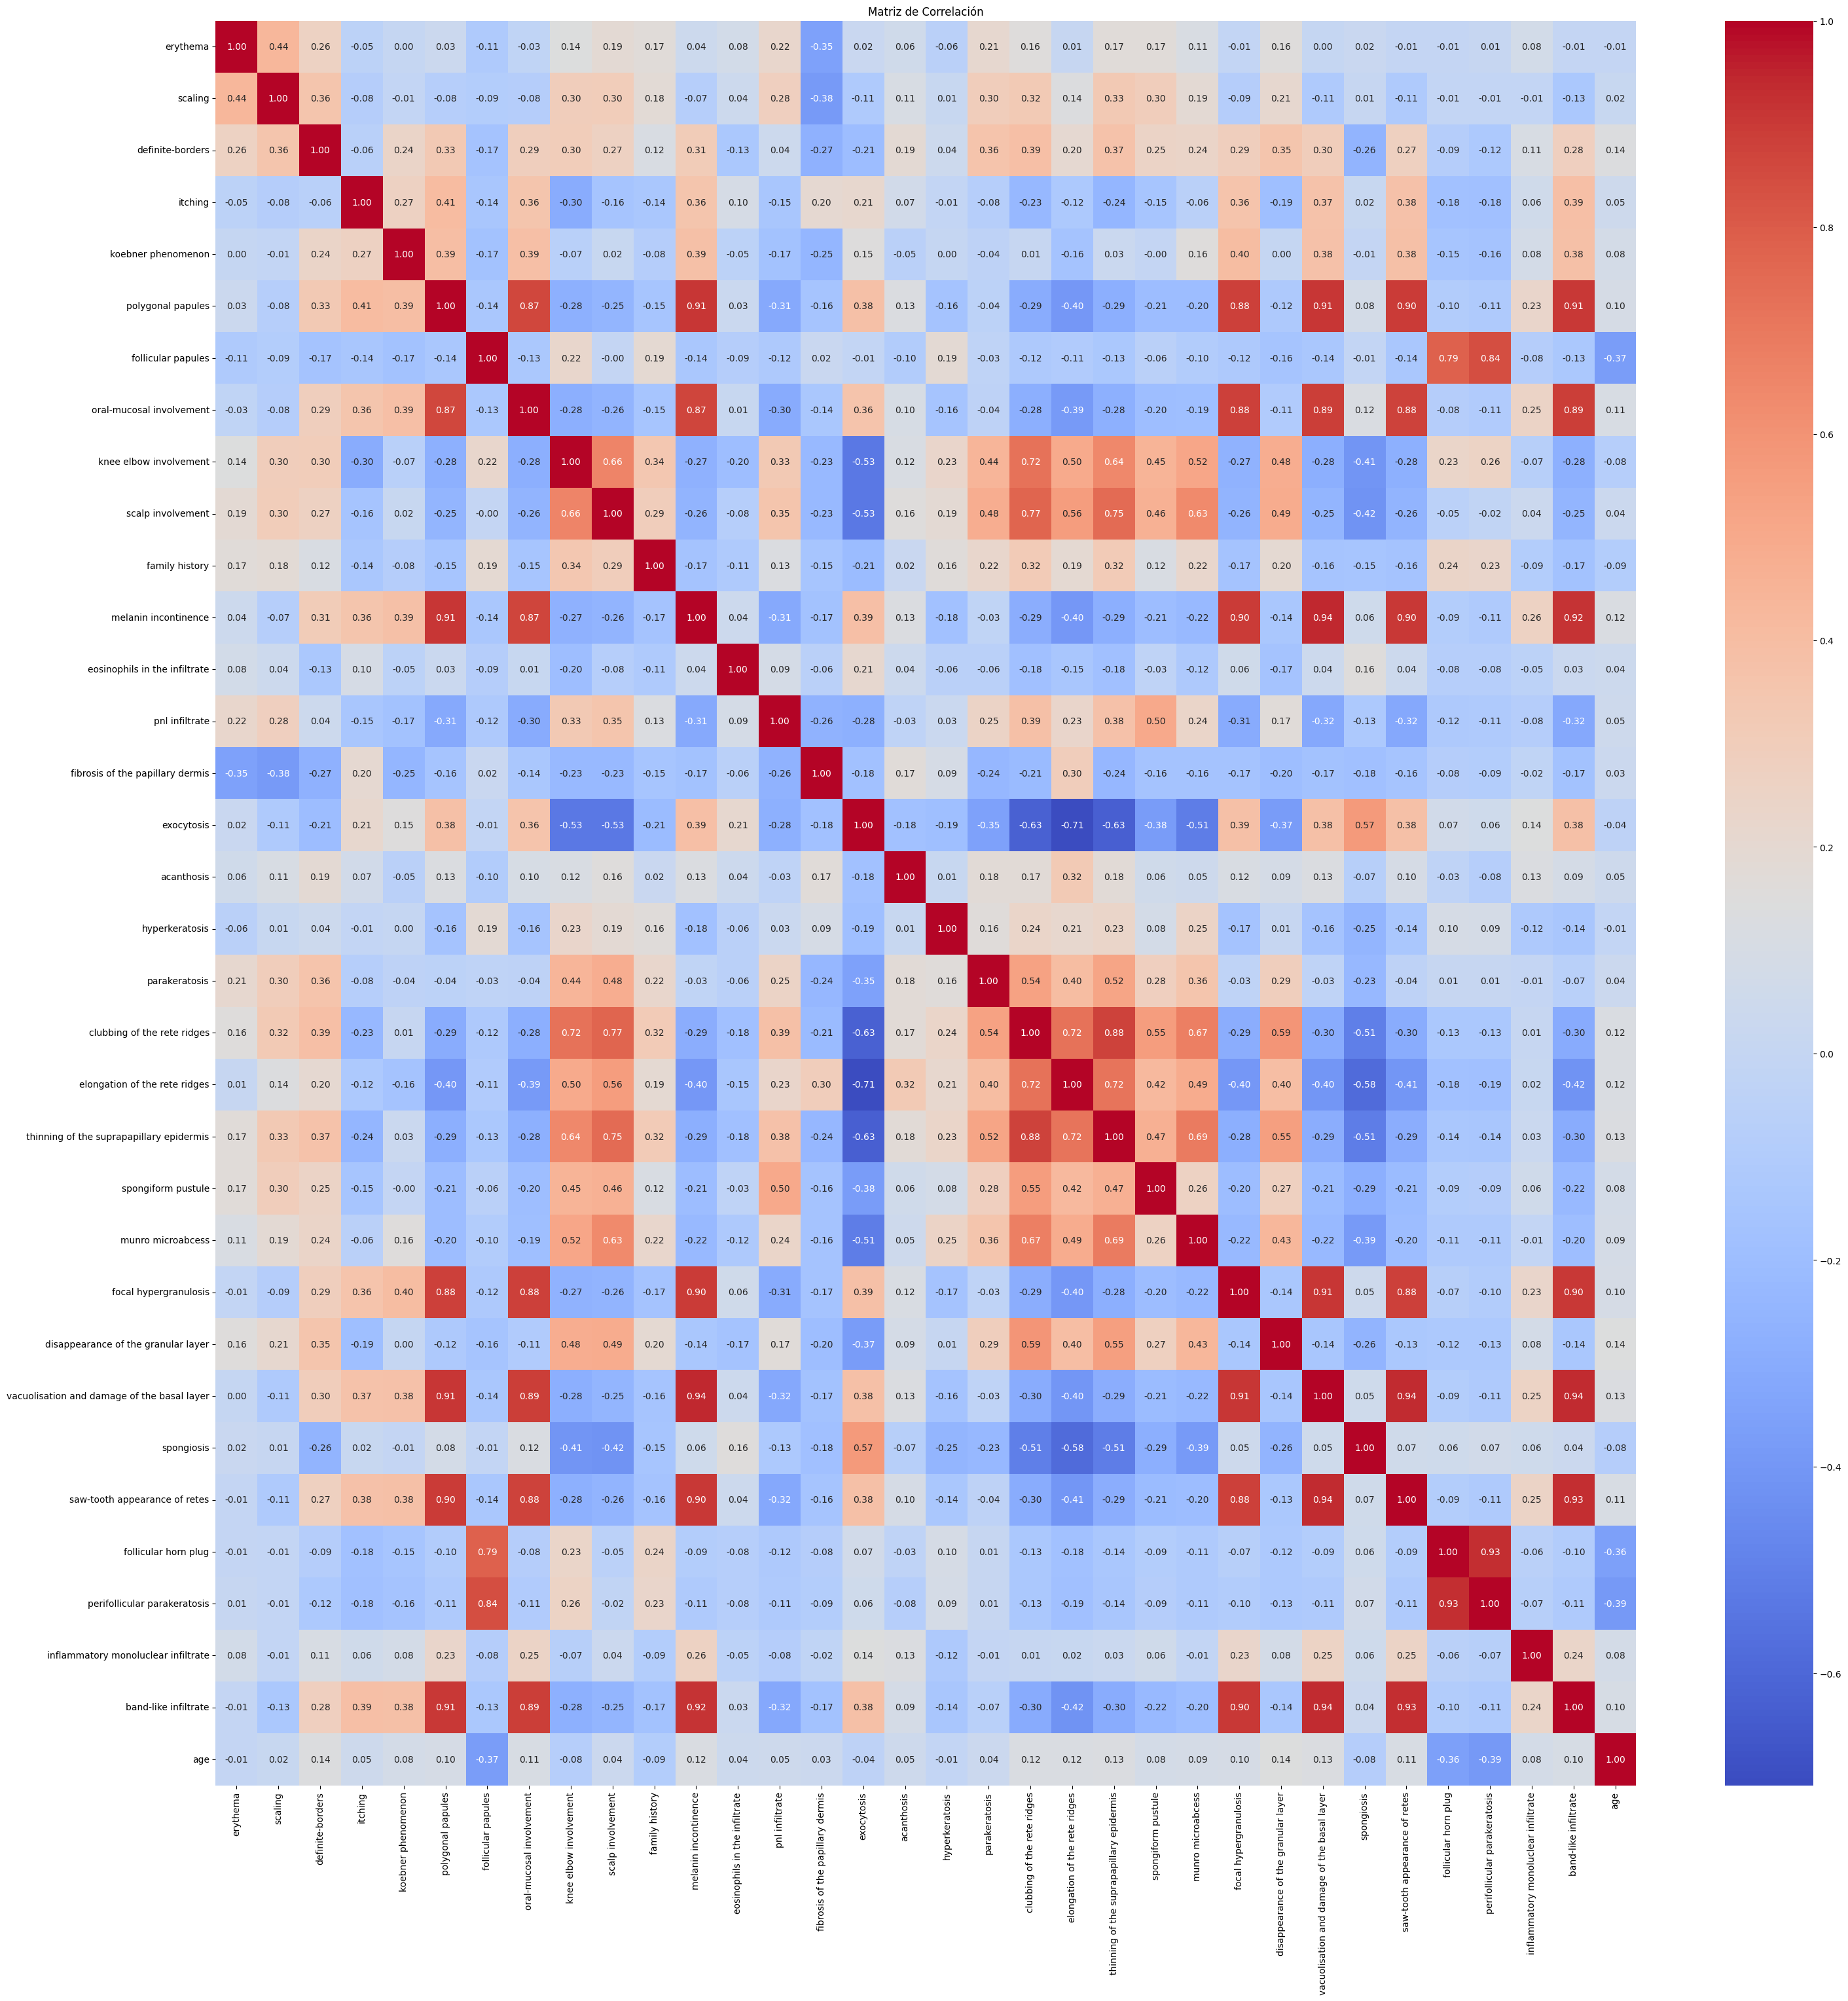

In [538]:
# Calcular la matriz de correlación

# Se excluye la columna 'target' para calcular la correlación solo entre las características
data_entrada = data.drop(columns=['target'])
corr_matrix = data_entrada.corr()


# Visualizar la matriz de correlación
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

Distribución de la variable objetivo (target):
target
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


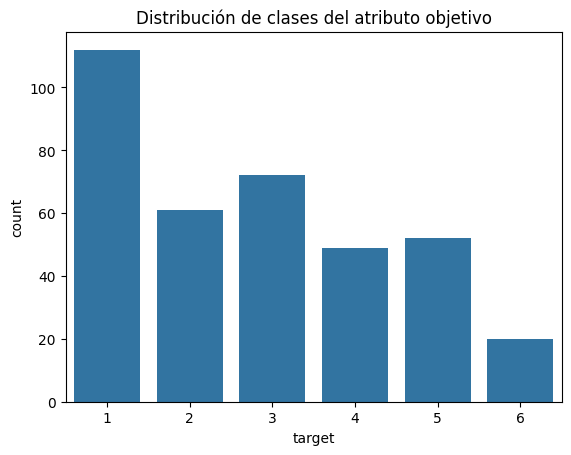

In [539]:
# Distribución del atributo objetivo 'target'
target_counts = data['target'].value_counts()
print(f"Distribución de la variable objetivo (target):")
print(target_counts)

# Gráfico de barras para ver el balance de clases
sns.countplot(x='target', data=data)
plt.title("Distribución de clases del atributo objetivo")
plt.show()



In [540]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

1

In [541]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

,0
erythema,0
scaling,0
definite-borders,0
itching,0
koebner phenomenon,0
polygonal papules,0
follicular papules,0
oral-mucosal involvement,0
knee elbow involvement,0
scalp involvement,0


In [542]:
# Total faltantes por clase
faltantes_por_clase = data.groupby('target').apply(lambda x: x.isnull().sum())

# Ordenamos los resultados de manera descendente por la cantidad de valores faltantes
faltantes_por_clase = faltantes_por_clase.sum(axis=1).sort_values(ascending=False)

# Mostrar los resultados
print(faltantes_por_clase)

target
5    4
1    1
2    1
3    1
4    1
6    0
dtype: int64


<ipython-input-542-fd84c4c5c94b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_clase = data.groupby('target').apply(lambda x: x.isnull().sum())


In [543]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['target'].value_counts())

target
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [544]:
# Se imputa la mediana en la columna 'edad'
data['age'] = data['age'].fillna(data['age'].median())
# Se verifica si aun hay valores faltantes
print(data.isnull().sum())

erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

In [545]:
# Inicializar el modelo IsolationForest
model = IForest()

# Aplicar el modelo a los datos (sin la columna 'target')
X = data.drop(columns=['target'])

# Ajustar el modelo a los datos
model.fit(X)

# Predicción de outliers
outliers = model.labels_  # 0 = no outlier, 1 = outlier

# Añadir los resultados al dataframe
data['outliers'] = outliers

# Contar los datos atípicos por clase
outliers_by_class = data.groupby('target')['outliers'].sum()
print("Número de datos atípicos por clase:")
print(outliers_by_class)

Número de datos atípicos por clase:
target
1    13
2     0
3    18
4     0
5     0
6     6
Name: outliers, dtype: int64


# **Etapa 3: Modelado**

En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo target a partir de los valores de los demás atributos. Es decir, se va determinar el tipo de enfermedad erihematoescamosa. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento de varios modelos de regresión logística utilizando para ello el conjunto de datos de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.
5. Comparar las diferentes metricas de desempeño.

## **3.1 Modelado sin datos faltantes**

In [546]:
# Se separan los datos en conjunto de entrenamiento y prueba.

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['target'])
y = data['target']

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver la forma de los conjuntos de entrenamiento y prueba
print(f'Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}')

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


Conjunto de entrenamiento: (256, 35), Conjunto de prueba: (110, 35)
(256, 35) (256,)
(110, 35) (110,)


In [547]:
# Construccion del modelo de clasificación por regresión logística).
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

# Creción del modelo de regresión logística
model_sdf = LogisticRegression(max_iter=500)  # Numero de iteraciones para converger

# Entrenamiento del modelo con los datos de entrenamiento
model_sdf.fit(X_train, y_train)





/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [548]:
from sklearn.metrics import accuracy_score
# Se Prueba el modelo utilizando los datos de prueba.

predictions_sdf = model_sdf.predict(X_test)
predictions_sdf





array([1, 1, 4, 1, 3, 1, 2, 6, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 3, 4, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 2, 3,
       3, 1, 4, 6, 3, 4, 3, 5, 4, 1, 4, 5, 2, 4, 1, 1, 1, 2, 2, 4, 1, 1])

In [549]:
# Reportar la medida accuracy para el modelo construido.
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de prueba
from sklearn.metrics import accuracy_score

accuracy_sdf= accuracy_score(y_test, predictions_sdf)

# Mostrar la precisión
print(f'Precisión del modelo: {accuracy_sdf:.2f}')

Precisión del modelo: 0.96


# **3.2 Modelado sin datos faltantes ni atípicos**

---



In [550]:
#Establecer datos atipiticos, mediante el uso de Q
# Función para detectar outliers usando el IQR
def detectar_outliers(df):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Aplicar la detección de outliers
data_no_outliers = detectar_outliers(data)

# Verificar las dimensiones después de eliminar los outliers
data_no_outliers.shape

(27, 36)

In [551]:
# Se tiene una columna 'outliers' que indica los valores atípicos
data_clean_no_outliers = data[data['outliers'] == 0]

# Verificar el tamaño después de eliminar los outliers
print(f"Tamaño del conjunto sin datos faltantes ni atípicos: {data_clean_no_outliers.shape}")

data_clean_no_outliers.to_excel('D:\derma2.xlsx', index=False)


Tamaño del conjunto sin datos faltantes ni atípicos: (329, 36)


In [552]:
# Se separan los datos en conjunto de entrenamiento y prueba.

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data_clean_no_outliers.drop(columns=['target'])
y = data_clean_no_outliers['target']

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver la forma de los conjuntos de entrenamiento y prueba
print(f'Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}')

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


Conjunto de entrenamiento: (230, 35), Conjunto de prueba: (99, 35)
(230, 35) (230,)
(99, 35) (99,)


In [553]:
# Construccion del modelo de clasificación por regresión logística).
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

# Creción del modelo de regresión logística
model_sdfa = LogisticRegression(max_iter=500)  # Numero de iteraciones para converger

# Entrenamiento del modelo con los datos de entrenamiento
model_sdfa.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [554]:
from sklearn.metrics import accuracy_score
# Se Prueba el modelo utilizando los datos de prueba.

predictions_sdfa = model_sdfa.predict(X_test)
predictions_sdfa


array([2, 2, 4, 3, 3, 2, 1, 4, 6, 3, 5, 1, 1, 1, 1, 2, 2, 4, 2, 5, 5, 1,
       1, 5, 4, 5, 4, 3, 1, 6, 5, 1, 1, 5, 1, 5, 1, 5, 4, 2, 3, 1, 5, 4,
       5, 2, 3, 6, 3, 3, 2, 5, 2, 1, 4, 2, 3, 4, 4, 2, 1, 2, 2, 1, 3, 4,
       1, 1, 5, 1, 1, 2, 5, 4, 6, 1, 5, 1, 1, 4, 1, 5, 4, 4, 3, 5, 3, 4,
       3, 1, 2, 1, 2, 4, 2, 1, 2, 1, 3])

In [555]:
# Reportar la medida accuracy para el modelo construido.
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de prueba
from sklearn.metrics import accuracy_score

accuracy_sdfa= accuracy_score(y_test, predictions_sdfa)

# Mostrar la precisión
print(f'Precisión del modelo: {accuracy_sdfa:.2f}')

Precisión del modelo: 0.97


# **3.3 Modelado sin datos faltantes ni atípicos, ni correlacionados**

In [556]:
# 3. Eliminar características altamente correlacionadas
corr_matrix2 = data_clean_no_outliers.corr().abs()
upper = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))  # Solo la parte superior de la matriz
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]  # Eliminar columnas con alta correlación
data_clean_corr = data_clean_no_outliers.drop(columns=to_drop)
# Verificar las dimensiones después de eliminar los outliers
data_clean_corr.shape




(329, 30)

In [557]:
# Se separan los datos en conjunto de entrenamiento y prueba.

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data_clean_corr.drop(columns=['target'])
y = data_clean_corr['target']

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver la forma de los conjuntos de entrenamiento y prueba
print(f'Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}')

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


Conjunto de entrenamiento: (230, 29), Conjunto de prueba: (99, 29)
(230, 29) (230,)
(99, 29) (99,)


In [558]:
# Construccion del modelo de clasificación por regresión logística).
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

# Creción del modelo de regresión logística
model_sdfac = LogisticRegression(max_iter=500)  # Numero de iteraciones para converger

# Entrenamiento del modelo con los datos de entrenamiento
model_sdfac.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [559]:
from sklearn.metrics import accuracy_score
# Se Prueba el modelo utilizando los datos de prueba.

predictions_sdfac = model_sdfac.predict(X_test)
predictions_sdfac

array([2, 2, 4, 3, 3, 2, 1, 4, 6, 3, 5, 1, 1, 1, 1, 2, 2, 4, 2, 5, 5, 1,
       1, 5, 4, 5, 4, 3, 1, 6, 5, 1, 1, 5, 1, 5, 1, 5, 4, 2, 3, 1, 5, 4,
       5, 2, 3, 6, 3, 3, 2, 5, 2, 1, 4, 2, 3, 4, 4, 2, 1, 2, 2, 1, 4, 4,
       1, 1, 5, 1, 1, 2, 5, 4, 6, 1, 5, 1, 1, 4, 1, 5, 4, 4, 3, 5, 3, 4,
       3, 1, 2, 1, 2, 4, 2, 1, 2, 1, 3])

In [560]:
# Reportar la medida accuracy para el modelo construido.
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de prueba
from sklearn.metrics import accuracy_score

accuracy_sdfac= accuracy_score(y_test, predictions_sdfac)

# Mostrar la precisión
print(f'Precisión del modelo: {accuracy_sdfac:.2f}')

Precisión del modelo: 0.96


# **3.4 Modelado aplicando PCA**

In [561]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


X = data_clean_corr.drop('target', axis=1)
y = data_clean_corr['target']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [562]:
# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Ver cuántos componentes fueron seleccionados
print(f"Number of components: {X_pca.shape[1]}")

Number of components: 21


In [563]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model_pca = LogisticRegression()
model_pca.fit(X_train, y_train)

predictions_pca = model_pca.predict(X_test)
predictions_pca

# Hacer predicciones
predictions_pca = model_pca.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_pca= accuracy_score(y_test, predictions_pca)
print(f"Accuracy: {accuracy_pca:.2f}")

Accuracy: 0.94


# **Impresion de resultados**

In [564]:
# Imprimir con etiquetas y valores numéricos usando format()

print(f"Resultado Accuracy sin datos Faltantes:: {accuracy_sdf:.2f}")

print(f"Resultado Accuracy sin datos faltantes ni atípicos: {accuracy_sdfa:.2f}")

print(f"Resultado Accuracy sin datos faltantes ni atípicos ni correlacionados: {accuracy_sdfac:.2f}")

print(f"Resultado Accuracy aplicando PCA: {accuracy_pca:.2f}")

Resultado Accuracy sin datos Faltantes:: 0.96
Resultado Accuracy sin datos faltantes ni atípicos: 0.97
Resultado Accuracy sin datos faltantes ni atípicos ni correlacionados: 0.96
Resultado Accuracy aplicando PCA: 0.94


**CONCLUSION**
Sin datos faltantes: Buen desempeño si los datos son completos.

Sin datos faltantes ni atípicos: Mejor desempeño ya que se elimina el ruido y la distorsión por valores extremos.

Sin datos faltantes ni atípicos ni correlacionados: Optimización adicional al reducir la redundancia y mejorar la capacidad de generalización.

Aplicando PCA: Posible mejora si se reduce la dimensionalidad, pero depende del tipo de datos y el modelo.


# Fin del programa